In [83]:
import quandl
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime

from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression

In [70]:
quandl.ApiConfig.api_key = 'zZzhwTNJ1Z8SxApaAd8K'

df = quandl.get("WIKI/AMZN")
df = df[['Adj. Close']]
df

,Adj. Close
Date,
1997-05-16,1.729167
1997-05-19,1.708333
1997-05-20,1.635833
1997-05-21,1.427500
1997-05-22,1.395833
...,...
2018-03-21,1581.860000
2018-03-22,1544.100000
2018-03-23,1495.560000


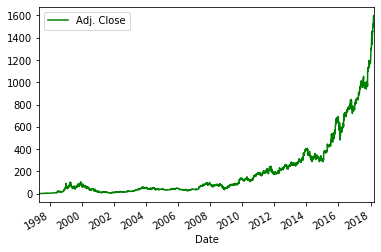

In [87]:
df['Adj. Close'].plot(color='g')
plt.legend(loc='upper left')
plt.show()

In [72]:
forecast = 30
df['Prediction'] = df[['Adj. Close']].shift(-forecast)

X = np.array(df.drop(['Prediction'], 1))
X = preprocessing.scale(X)

X_forecast = X[-forecast:]
X = X[:-forecast]

y = np.array(df['Prediction'])
y = y[:-forecast]

In [73]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

clf = LinearRegression()
clf.fit(X_train, y_train)

confidence = clf.score(X_test, y_test)

forecast_predicted = clf.predict(X_forecast)
print(forecast_predicted)

[1502.87348213 1541.7866017  1553.19217124 1539.27332961 1560.21016406
 1575.72642439 1577.68592466 1593.91569867 1617.29125901 1606.67374937
 1607.1742739  1586.94030367 1594.18193512 1619.05906904 1634.00025863
 1641.83825973 1649.14378792 1677.92927293 1698.69571605 1687.82261942
 1690.82576658 1681.58203703 1670.2510137  1641.76371352 1686.04415993
 1681.09216196 1640.8798085  1589.18733931 1653.40357113 1590.77410856]


(736445.0, 736810.0)

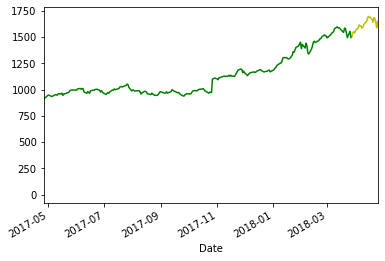

In [86]:
dates = pd.date_range(start="2018-03-28", end="2018-04-26")
plt.plot(dates, forecast_predicted, color='y')
df['Adj. Close'].plot(color='g')
plt.xlim(xmin=datetime.date(2017,4,26))